# I. Exploration

## 1. Data Loading and Visualisation

First we load some useful libraries for data loading and data visualization in Python

In [42]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from math import *

In [43]:
def Load_DataSet(name, data_location = "data/"):
    return pd.read_csv(data_location + name + ".txt", sep = " ")

In [44]:
# Data loading
path = ""
data_location = "data/"
rain = Load_DataSet("rain_project", data_location = path + data_location)
# Let's take a look at the data
rain.head()

,Id,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
1,22092001_527,2017-06-11,3.945000,289.408750,285.277083,78.783333,246.750000,0.0,3.663785,244.299500,3.038503,1.416360,289.232315,285.170885,79.037785,2.328277,101672.850,0.2,low_rain
2,22092001_65,2016-03-06,3.739583,276.375833,273.422500,81.700000,260.333333,1.2,3.328476,305.660752,2.463886,-1.898971,275.808688,273.672591,86.331598,10.675441,100583.760,4.2,high_rain
3,22092001_210,2016-07-29,3.273750,288.869167,286.723333,87.620833,259.041667,0.2,3.232380,256.042392,2.963872,0.985627,289.627425,286.485126,82.301031,4.582309,101482.984,0.0,no_rain
4,22092001_136,2016-05-16,1.745000,284.288750,280.215833,76.587500,216.541667,0.0,1.720926,139.297271,-0.260693,-1.397603,284.726139,280.367340,75.384116,0.940254,102223.586,0.0,no_rain
5,22092001_33,2016-02-03,5.718750,277.527917,274.529167,81.391667,285.541667,1.6,4.424012,285.578800,3.940056,-1.457606,277.751699,274.590656,80.435085,13.903076,102416.220,0.0,no_rain


**Remark**:

In this database, we realise that the qualitative variables including "Id", "date", "rain_class". 

The other variables are considered quantitative including "ff","t", "td", "hu", "dd", "precip", "ws_arome", "p3031_arome", "u10_arome", "v10_arome", "t2m_arome", "d2m_arome", "r_arome", "tp_arome", "msl_arome", "rain"

## Data transformation

### Date to month

In [45]:
#Replace the column "date" into "month" to obtain the new data
from datetime import datetime, timedelta

rain["date"] = pd.to_datetime(rain["date"]).dt.month
rain = rain.rename(columns= {"date":"month"})

In [46]:
names = list(rain.columns)
num_var = names[2:-1]
qual_var = [names[i] for i in [0,1,-1]]

### Logarithm transformation ($\log(\cdot + 1)$)

In [47]:
rain_log = rain.copy()

rain_log["precip"] = np.log(rain_log["precip"] + 1)
rain_log["tp_arome"] = np.log(rain_log["tp_arome"] + 1)
rain_log["rain_log"] = np.log(rain_log["rain"] + 1)

rain_log.rename(columns = {'precip':'precip_log', 'tp_arome':'tp_arome_log'}, inplace = True)

num_var_log = num_var
num_var_log = list(map(lambda item: item.replace("precip","precip_log"), num_var_log))
num_var_log = list(map(lambda item: item.replace("tp_arome","tp_arome_log"), num_var_log))

qual_var_log = qual_var + ["rain_log"]

## Rain data set presentation

## Brief description of the data sets

In [48]:
print(rain.describe())

            month          ff           t          td          hu          dd  \
count  688.000000  688.000000  688.000000  688.000000  688.000000  688.000000   
mean     6.415698    4.082196  283.650528  281.080129   85.560841  206.575367   
std      3.455500    1.591358    4.943628    4.609328    8.490620   77.250928   
min      1.000000    1.158333  269.478333  267.113750   46.750000   32.916667   
25%      3.000000    2.869583  279.850208  277.645417   80.534375  158.739583   
50%      6.000000    3.858542  283.185000  281.176458   86.395833  222.812500   
75%      9.000000    4.970417  287.588333  284.725104   92.055208  260.677083   
max     12.000000   12.500000  299.517917  291.064583  100.000000  343.041667   

           precip    ws_arome  p3031_arome   u10_arome   v10_arome  \
count  688.000000  688.000000   688.000000  688.000000  688.000000   
mean     2.383721    3.719291   203.323936    1.158044    0.385976   
std      4.624367    1.516759    77.343712    2.344850    2.

In [49]:
print(rain_log.describe())

            month          ff           t          td          hu          dd  \
count  688.000000  688.000000  688.000000  688.000000  688.000000  688.000000   
mean     6.415698    4.082196  283.650528  281.080129   85.560841  206.575367   
std      3.455500    1.591358    4.943628    4.609328    8.490620   77.250928   
min      1.000000    1.158333  269.478333  267.113750   46.750000   32.916667   
25%      3.000000    2.869583  279.850208  277.645417   80.534375  158.739583   
50%      6.000000    3.858542  283.185000  281.176458   86.395833  222.812500   
75%      9.000000    4.970417  287.588333  284.725104   92.055208  260.677083   
max     12.000000   12.500000  299.517917  291.064583  100.000000  343.041667   

       precip_log    ws_arome  p3031_arome   u10_arome   v10_arome  \
count  688.000000  688.000000   688.000000  688.000000  688.000000   
mean     0.719286    3.719291   203.323936    1.158044    0.385976   
std      0.876752    1.516759    77.343712    2.344850    2.

### Qualitative variable
#### Histogram of `month` variable

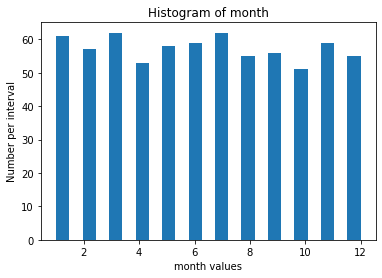

In [50]:
var = "month"

plt.figure()
plt.hist(rain[var], bins = 2*12-1)
plt.title("Histogram of "+var)
plt.xlabel(var+" values")
plt.ylabel("Number per interval")
plt.show()

### Quantitatives variables
#### Histograms

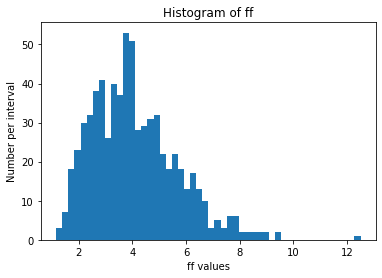

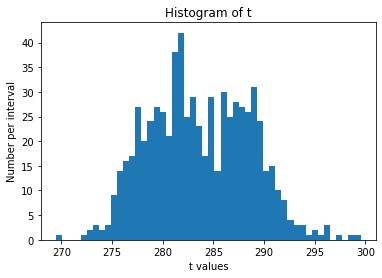

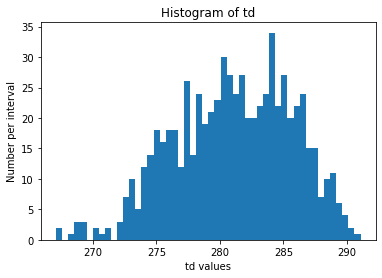

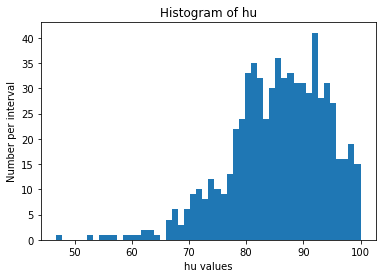

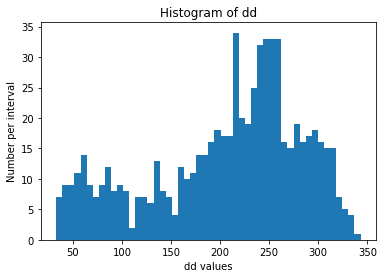

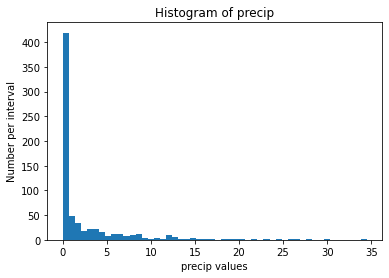

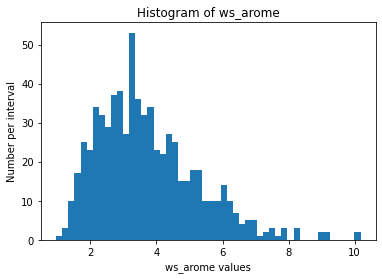

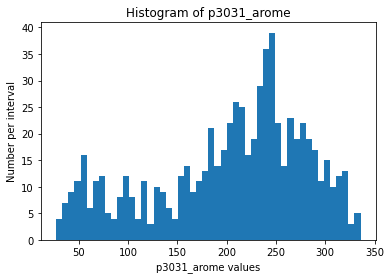

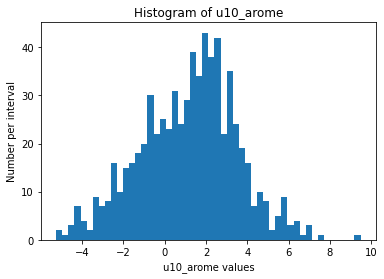

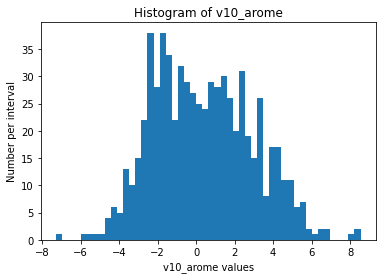

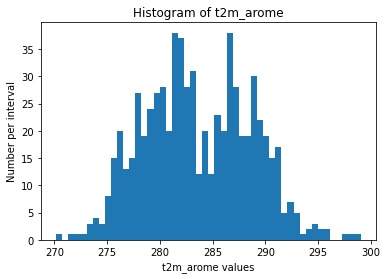

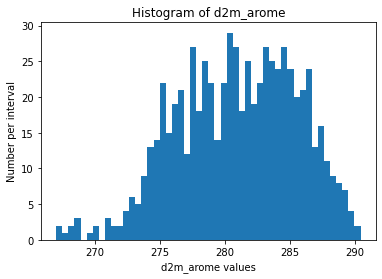

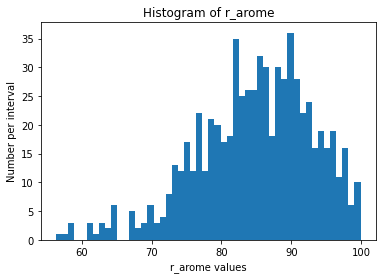

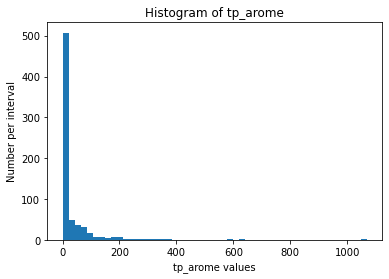

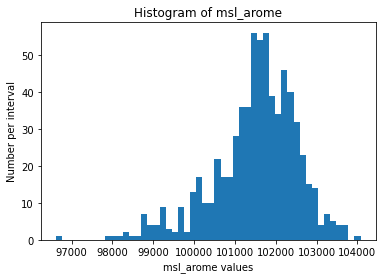

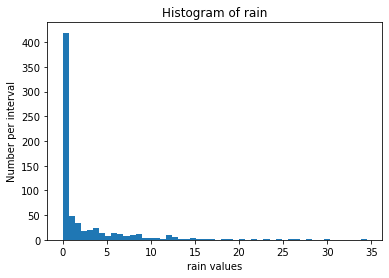

In [51]:
for var in num_var:
    plt.figure()
    plt.hist(rain[var], bins=50)
    plt.title("Histogram of "+var)
    plt.xlabel(var+" values")
    plt.ylabel("Number per interval")
plt.show()

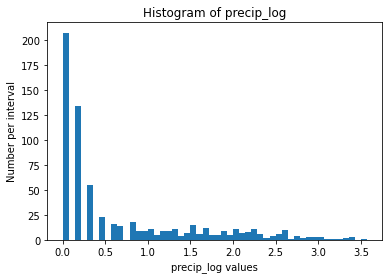

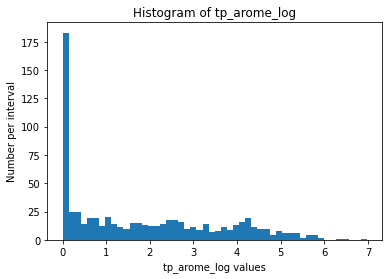

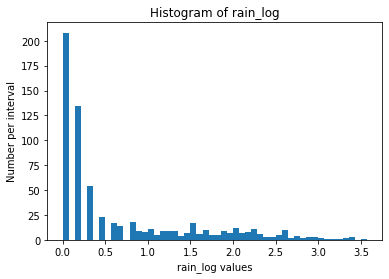

In [52]:
for var in ["precip_log", "tp_arome_log", "rain_log"]:
    plt.figure()
    plt.hist(rain_log[var], bins=50)
    plt.title("Histogram of "+var)
    plt.xlabel(var+" values")
    plt.ylabel("Number per interval")
plt.show()

#### Correlation between variables
##### Classical data set

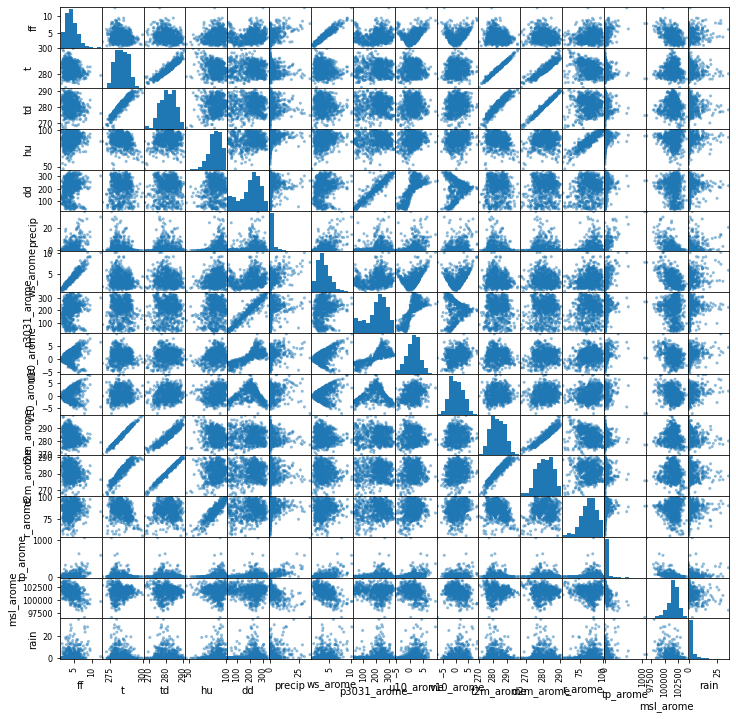

In [53]:
pd.plotting.scatter_matrix(rain[num_var], figsize=(12, 12))
plt.show()

[]

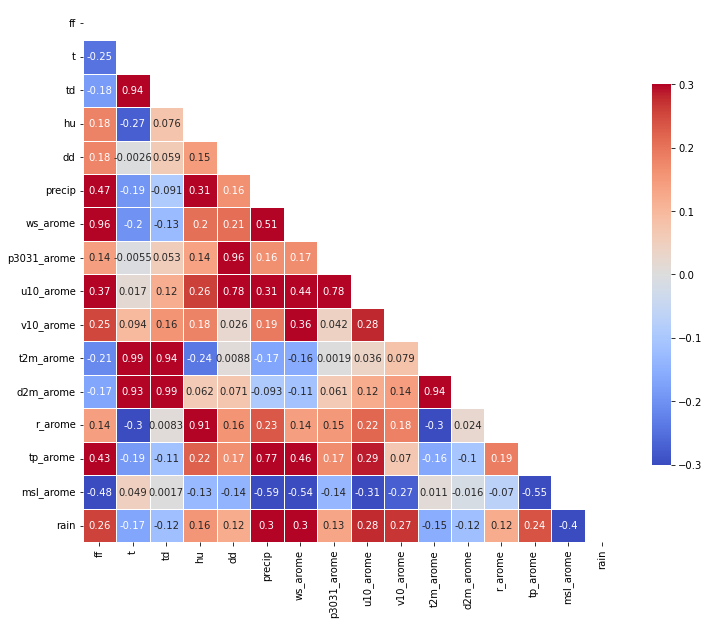

In [54]:
rain_corr = rain[num_var].corr()

mask = np.zeros_like(rain_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 14))
cmap= 'coolwarm'
sns.heatmap(rain_corr, mask=mask, cmap=cmap, annot=True, vmax=.3, vmin=-.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.plot()

##### Logarithmical data set

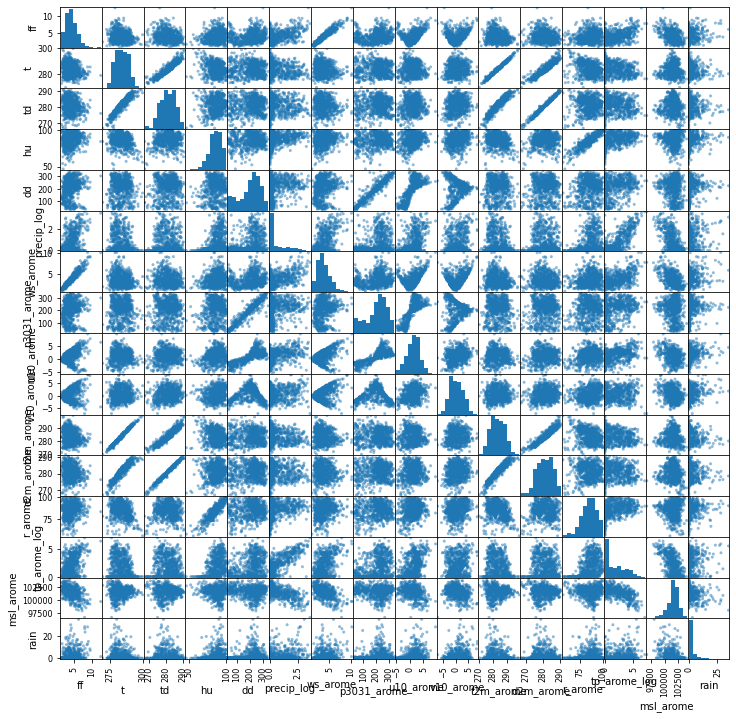

In [55]:
pd.plotting.scatter_matrix(rain_log[num_var_log], figsize=(12, 12))
plt.show()

[]

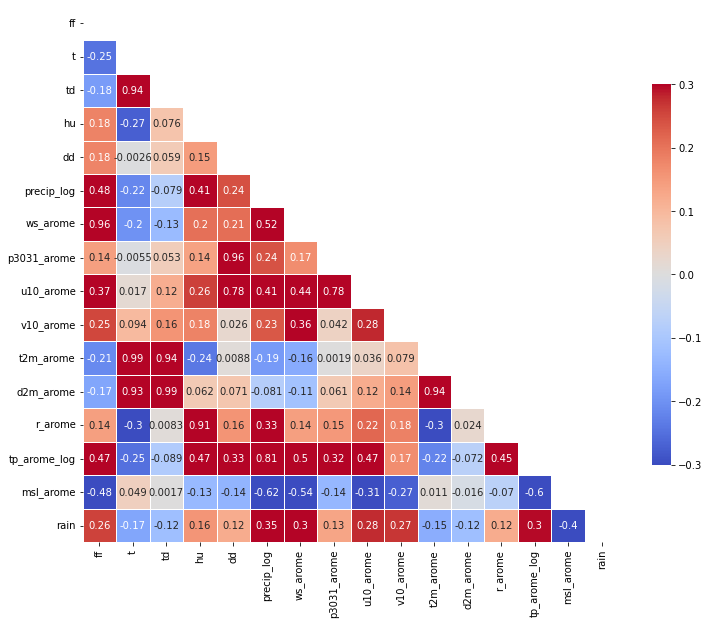

In [56]:
rain_log_corr = rain_log[num_var_log].corr()

mask = np.zeros_like(rain_log_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 14))
cmap= 'coolwarm'
sns.heatmap(rain_log_corr, mask=mask, cmap=cmap, annot=True, vmax=.3, vmin=-.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.plot()

## PCA

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [58]:
num_var_in = num_var[:-1]

pcaR = PCA()
loadingR = pd.DataFrame(scale(rain[num_var_in]), columns = rain[num_var_in].columns)
pca_DataSet = pcaR.fit(loadingR).transform(loadingR)

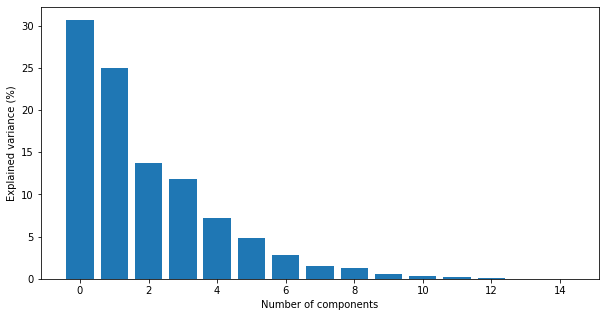

In [59]:
plt.figure(figsize = (10,5))
x = np.arange(pcaR.explained_variance_ratio_.size)
plt.bar(x, pcaR.explained_variance_ratio_*100)
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.show()

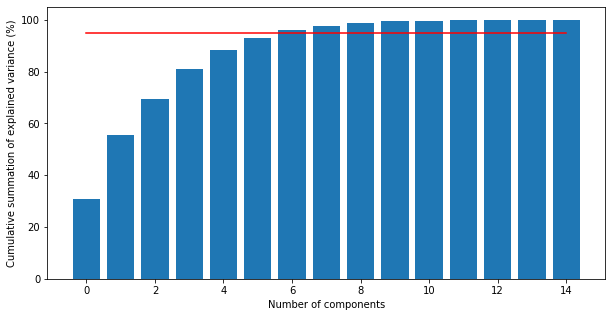

In [60]:
plt.figure(figsize = (10,5))
x = np.arange(pcaR.explained_variance_ratio_.size)
plt.bar(x, pcaR.explained_variance_ratio_.cumsum()*100)
plt.plot(x, np.zeros(x.shape)+95, color  ="red")
plt.xlabel('Number of components')
plt.ylabel('Cumulative summation of explained variance (%)')
plt.show()

In [61]:
nb_PCA_components = 6

In [62]:
pca_DataSet = pd.DataFrame(pca_DataSet)
pca_DataSet["rain_class"] = rain["rain_class"].astype("category")

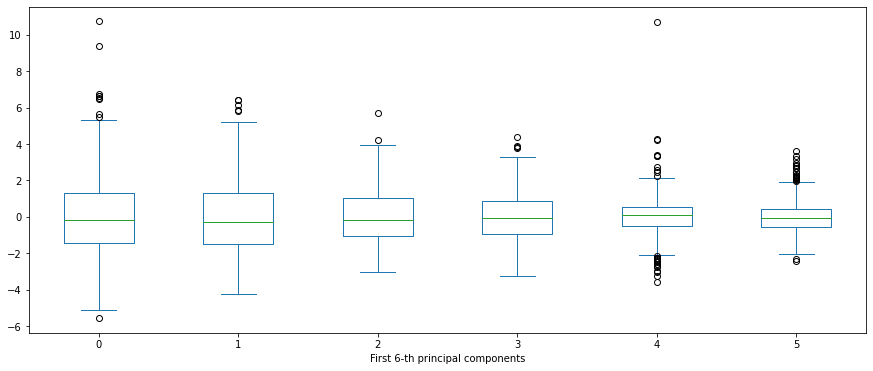

In [63]:
pca_DataSet.iloc[:,0:nb_PCA_components].plot(kind = "box", figsize = (15, 6) )
plt.xlabel('First %d-th principal components' % nb_PCA_components)
plt.show()

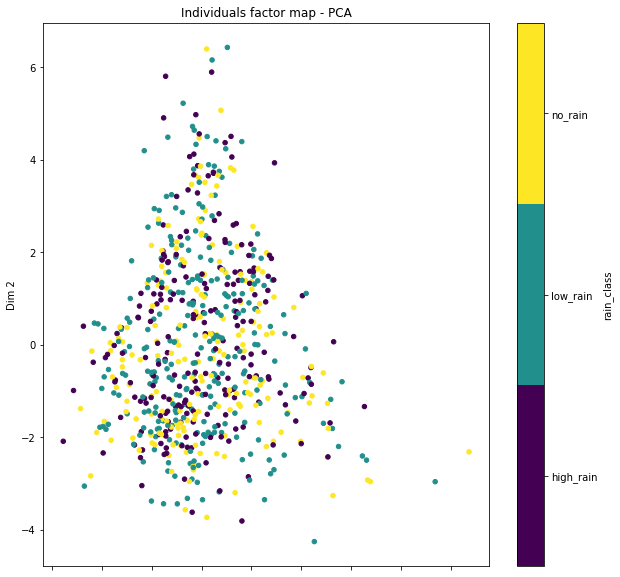

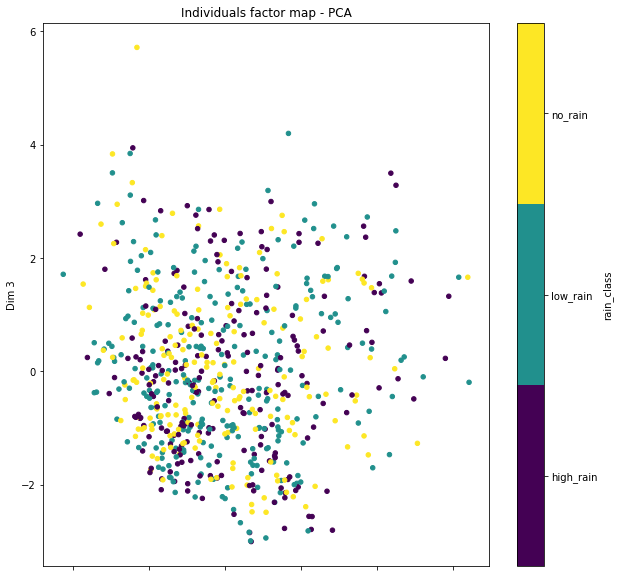

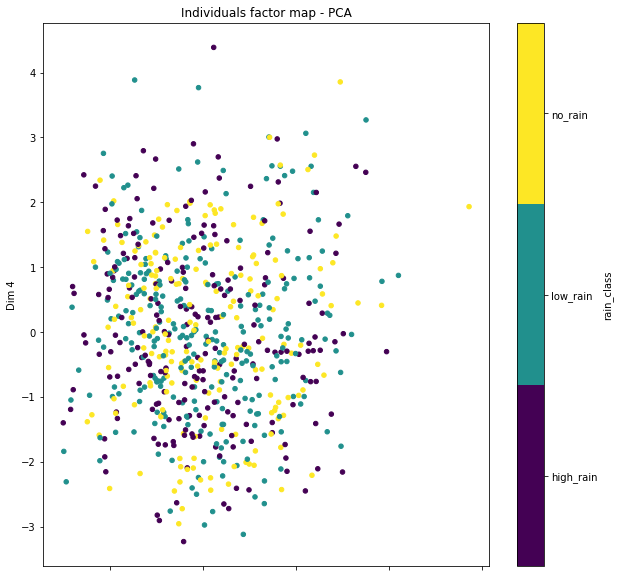

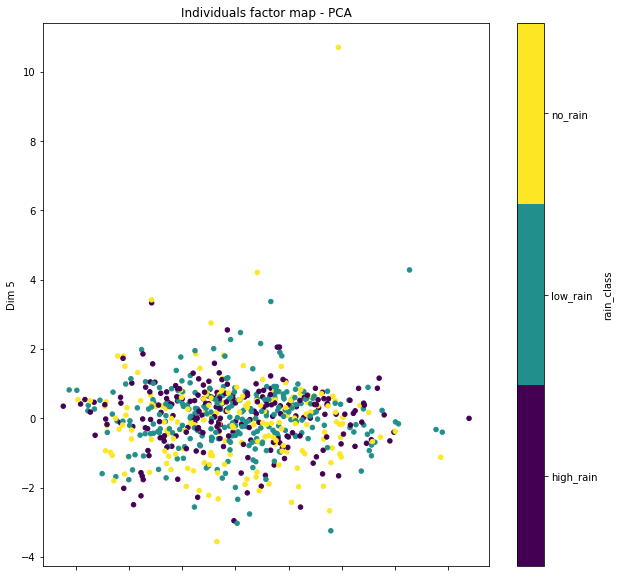

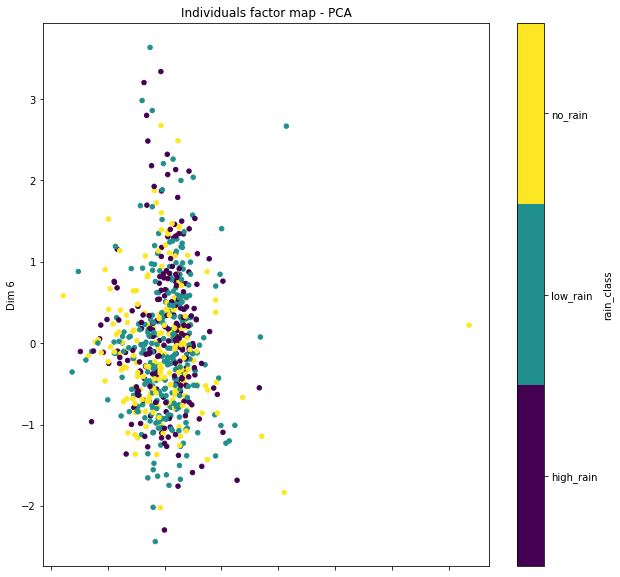

In [64]:
for dim in range(5):
    pca_DataSet.plot.scatter(x=dim, y=dim+1, c="rain_class", cmap="viridis", figsize = (10, 10))
    plt.xlabel("Dim "+str(dim+1))
    plt.ylabel("Dim "+str(dim+2))
    plt.title('Individuals factor map - PCA')
    plt.show()

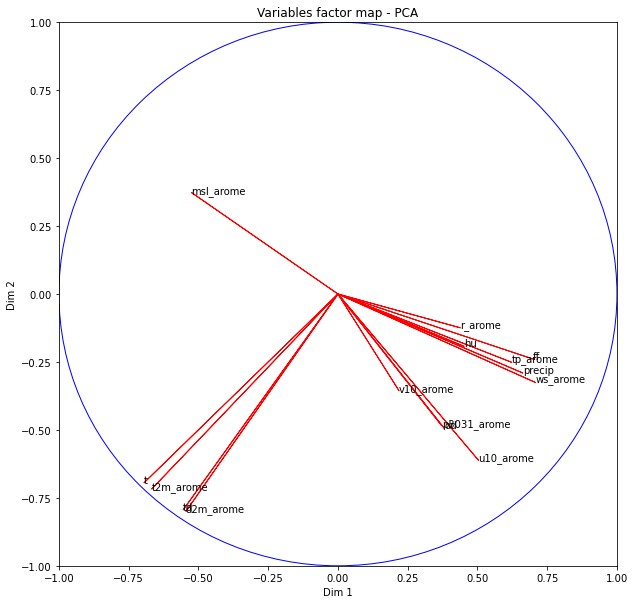

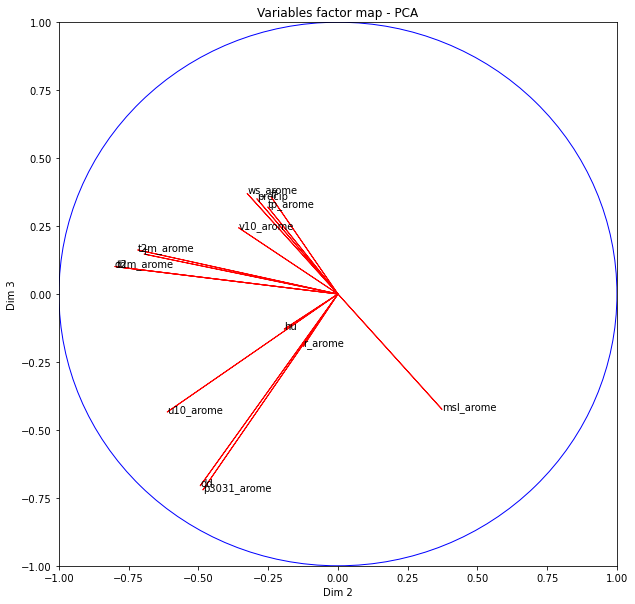

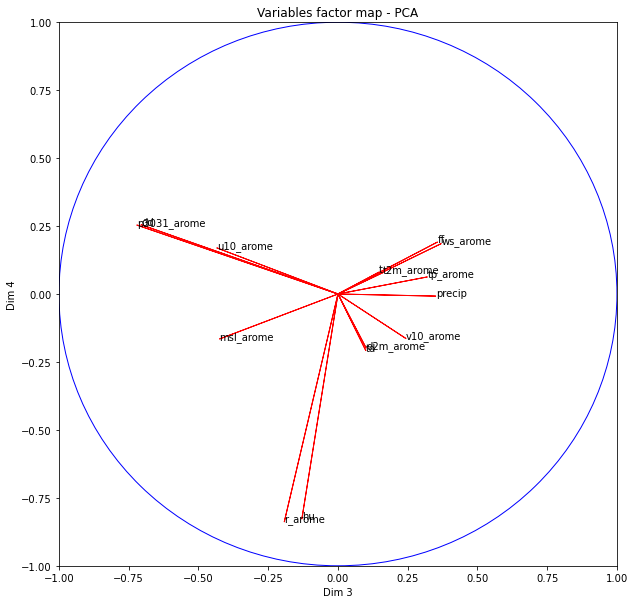

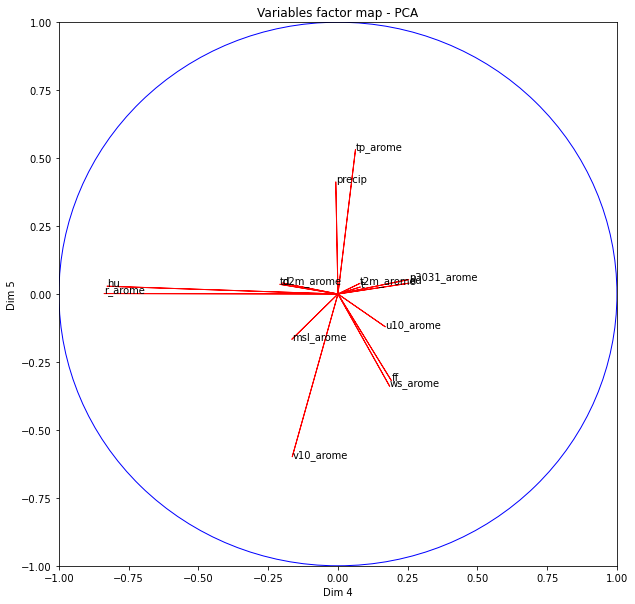

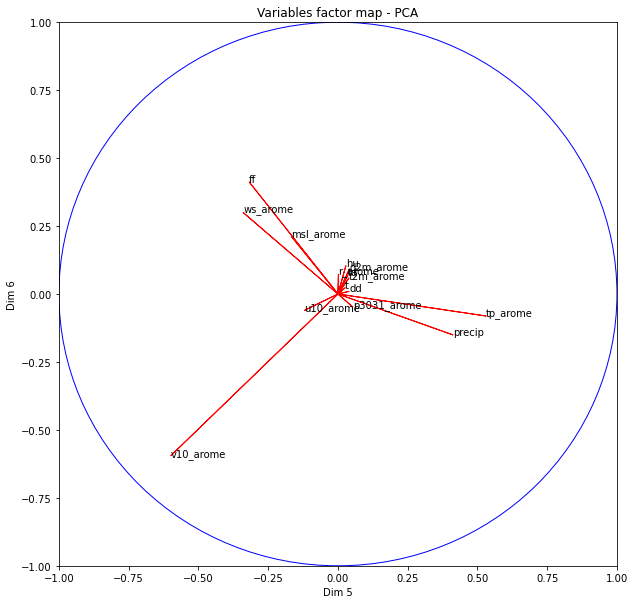

In [65]:
for dim in range(5):
    coord1 = pcaR.components_[dim] * np.sqrt(pcaR.explained_variance_[dim])
    coord2 = pcaR.components_[dim+1] * np.sqrt(pcaR.explained_variance_[dim+1])
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    for i, j, nom in zip(coord1, coord2, loadingR.columns):
        plt.text(i, j, nom)
        plt.arrow(0, 0, i, j, color = 'r', width = 0.0001)
    plt.axis((-1, 1, -1, 1))
    plt.xlabel("Dim "+str(dim+1))
    plt.ylabel("Dim "+str(dim+2))
    #Cercle
    c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
    ax.add_patch(c)
    plt.title('Variables factor map - PCA')
    plt.show()

## Data preparation

### Month class to dummies variables

In [67]:
rain_class = pd.get_dummies(rain, columns =  ['month'])
rain_log_class = pd.get_dummies(rain_log, columns =  ['month'])

### Data normalization

In [68]:
for var in num_var:
    rain[var] = (rain[var] - rain[var].mean()) / rain[var].std()
for var in num_var_log:
    rain_log[var] = (rain_log[var] - rain_log[var].mean()) / rain_log[var].std()

### Spliting the data into a training set and a test set

In [69]:
def SplitingData(train_set_rate = .8, random = False):
    if not(random):
        limit_train_test_set = ceil(train_set_rate*rain.shape[0])

        rain_train = rain.iloc[limit_train_test_set:, :]
        rain_test = rain.iloc[:limit_train_test_set, :]
    
    else:
        rain_train = rain.sample(frac = train_set_rate)
        rain_test = rain.drop(rain_train.index)
    return (rain_train, rain_test)

train_set_rate = .8 # 80 %
rain_train, rain_test = SplitingData(train_set_rate, random = False)

In [70]:
print(rain_train.head())
print(rain_train.describe())

               Id  month        ff         t        td        hu        dd  \
584   22092001_45      2  0.375395 -1.655521 -2.100750 -1.275232 -0.154156   
585  22092001_301     10 -0.545726 -0.271921  0.068854  1.022402 -1.621776   
586  22092001_677     11  0.332716 -0.887866 -1.339703 -1.349824  1.534065   
587  22092001_472      4 -0.479483 -0.381321 -0.338472  0.169500  0.706136   
588  22092001_247      9 -0.043796  1.582149  2.034162  0.986578  0.578845   

       precip  ws_arome  p3031_arome  u10_arome  v10_arome  t2m_arome  \
584 -0.515470  0.603015    -1.042833  -0.725873  -1.898611  -1.592120   
585 -0.472220 -0.844957    -1.632093  -1.347744  -0.597564  -0.113199   
586 -0.515470  0.288903     1.712260   0.188324  -1.593737  -0.825405   
587 -0.472220 -0.262637     0.088090  -0.202840  -1.230896  -0.263945   
588 -0.255975  0.178149     0.546254   0.998542   0.464263   1.687919   

     d2m_arome   r_arome  tp_arome  msl_arome      rain rain_class  
584  -1.918495 -0.93605

In [71]:
print(rain_test.head())
print(rain_test.describe())

             Id  month        ff         t        td        hu        dd  \
1  22092001_527      6 -0.086213  1.164777  0.910535 -0.798235  0.520054   
2   22092001_65      3 -0.215296 -1.471529 -1.661333 -0.454718  0.695888   
3  22092001_210      7 -0.508023  1.055629  1.224301  0.242620  0.679167   
4  22092001_136      5 -1.468680  0.129100 -0.187510 -1.056853  0.129012   
5   22092001_33      2  1.028401 -1.238485 -1.421240 -0.491033  1.022205   

     precip  ws_arome  p3031_arome  u10_arome  v10_arome  t2m_arome  \
1 -0.515470 -0.036595     0.529785   0.801953   0.400758   1.118703   
2 -0.255975 -0.257664     1.323143   0.556898  -0.888709  -1.552726   
3 -0.472220 -0.321021     0.681613   0.770125   0.233228   1.197333   
4 -0.515470 -1.317523    -0.827820  -0.605044  -0.693706   0.221931   
5 -0.169476  0.464623     1.063498   1.186435  -0.717044  -1.166049   

   d2m_arome   r_arome  tp_arome  msl_arome      rain rain_class  
1   0.920853 -0.698998 -0.367364   0.153301 -0.47

## Saves data sets

In [72]:
def Save_DataSet(df, name, data_location = "data/"):
    df.to_csv(data_location + name + ".txt", sep = " ")

In [73]:
Save_DataSet(rain_train, "train_set")
Save_DataSet(rain_test, "test_set")